#### Librerias Importadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
df_nacimientos = pd.read_csv("db/nacimientos.csv")

In [3]:
df_muestra = df_nacimientos[:150][['PESO']].copy()
df_muestra

,PESO
0,3655
1,3520
2,2920
3,4100
4,4349
...,...
145,3374
146,2570
147,3894
148,3581


#### Contraste de hipótesis con un nivel de significación de a = 0.05
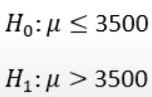

#### Media de la muestra

In [4]:
media_muestra = df_muestra['PESO'].mean()
print(f"La media muestral es de: {media_muestra}")

La media muestral es de: 3313.4733333333334


#### Hallar la diferencia

In [5]:
h0 = 3500   #Hipotesis nula
diferencia = h0 - media_muestra

In [6]:
print(f"La diferencia es: {diferencia}")

La diferencia es: 186.52666666666664


In [7]:
df_muestra['PESO'] = df_muestra['PESO'] + diferencia
df_muestra.head()

,PESO
0,3841.526667
1,3706.526667
2,3106.526667
3,4286.526667
4,4535.526667


In [8]:
df_muestra['PESO'].mean()

np.float64(3499.999999999999)

In [9]:
boot_medias = []

for _ in range(10000):
    df_boot = df_muestra.sample(150, replace=True)
    boot_medias.append(df_boot['PESO'].mean())

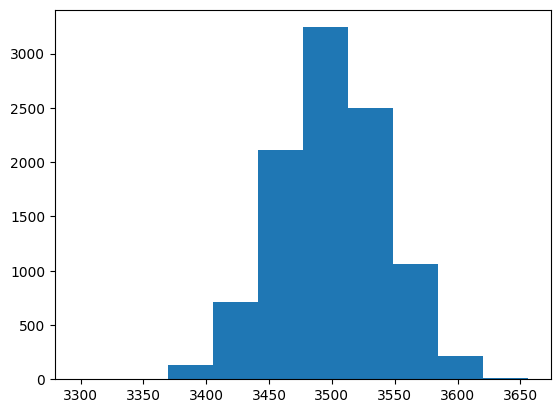

In [10]:
plt.hist(boot_medias);

In [11]:
media_muestra

np.float64(3313.4733333333334)

In [12]:
(boot_medias >= media_muestra).mean()

np.float64(0.9999)

In [13]:
df_nacimientos['PESO'].mean()

np.float64(3257.014866666667)